# Excercise 5


## Task 1 - Part 3

Setting up the environment:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from math import *
from utils import *

plt.rcParams['figure.dpi'] = 120 

Reading the data files. The function can be found in ```utils.py```

In [2]:
nonlinear_data = readData("nonlinear_function_data.txt")
X = nonlinear_data[0, :]
F = nonlinear_data[1, :]

Calculating $\epsilon$ in accordance with the lecture on diffusion maps:

In [3]:
# Calculating epsilon

D = np.zeros([1000, 1000])

for i in range(1000):
    for j in range(1000):
        D[i, j] = np.linalg.norm(np.array([X[i], F[i]])-np.array([X[j], F[j]]))
        
epsilon = 0.06 * D.max() # As recommended a little higher than 0.05 percent

In [4]:
epsilon

0.42648304901146694

We were not able to find a way to calculate L. For that matter, we iterated through L from $L=0$ to $L=200$ and looked for a minimum of the squared error. Larger numbers were not able due to the lack of computing power, however, we believe to have found a minimum at $L=23$.

In [5]:
# Iterate through L

min_squared_error = 1000
L_simulated = -1
final_results = np.zeros(1000)

for i in range(200):
    
    PHI = calc_PHI (X, i, epsilon)
    C = calc_C (PHI, F)

    results_array = np.zeros(1000)

    for j in range(1000):
        results_array[j] = nonlin_decomp(X[j], X, i, C, epsilon)

    squared_error = calc_error(F, results_array)**2
    
    if (squared_error < min_squared_error):
        min_squared_error = squared_error
        L_simulated = i
        final_results = results_array


In [6]:
min_squared_error

5.9464934074482105

In [7]:
L_simulated

23

Plotting the data

<Figure size 720x480 with 0 Axes>

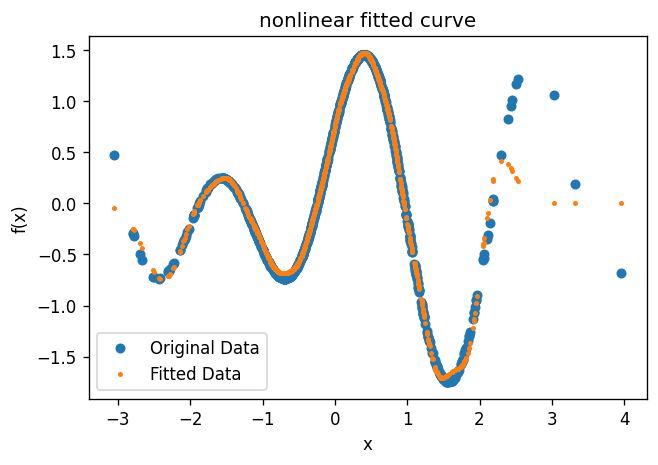

In [11]:
fig = plt.figure()
fig, ax = plt.subplots()

ax.set_title("nonlinear fitted curve")

ax.plot(X, F, 'o', label='Original Data', markersize=5)
ax.plot(X, final_results, 'o', label='Fitted Data', markersize= 2)

ax.legend()

ax.set_xlabel("x")
ax.set_ylabel("f(x)")

fig.savefig('images/task1_3_nonlinear.png')